# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


# Data description
● city: city this user signed up in
<br>● phone: primary device for this user
<br>● signup_date: date of account registration; in the form ‘YYYYMMDD’
<br>● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
<br>● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
<br>● avg_rating_by_driver: the rider’s average rating over all of their trips
<br>● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
<br>● surge_pct: the percent of trips taken with surge multiplier > 1
<br>● avg_surge: The average surge multiplier over all of this user’s trips
<br>● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
<br>● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
<br>● weekday_pct: the percent of the user’s trips occurring during a weekday

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json


%matplotlib inline

In [83]:
df = pd.read_json('ultimate_data_challenge.json')

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [84]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Data Cleaning

In [86]:
# display the number of missing values per column
missing_values = df.isnull().sum()

missing_values

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [87]:
# drop row with missing values

df = df.dropna()
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [88]:
#convert date columns to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

### EDA & Feature Engineering

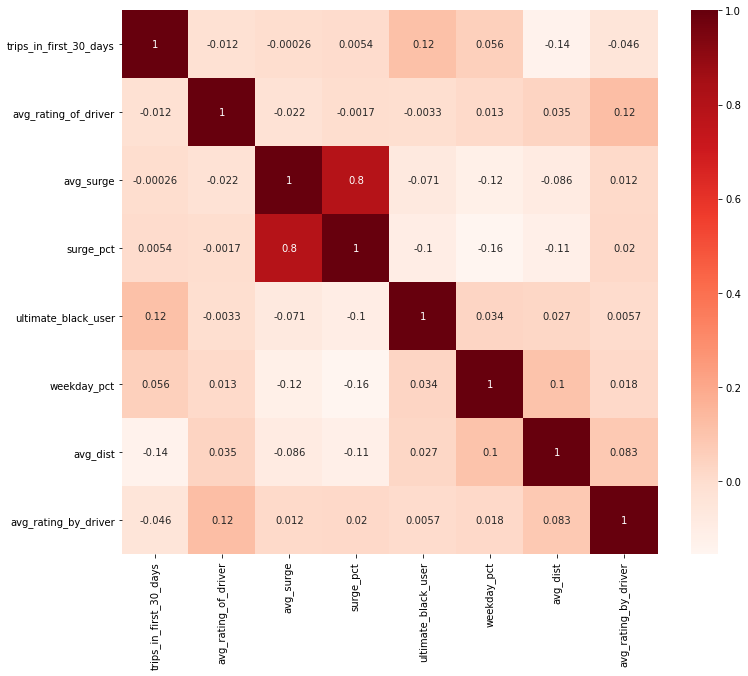

In [89]:
def correlation_heatmap(dataframe):
    """
    function that creates a heatmap showing the correlation of features
    """
    plt.figure(figsize=(12,10))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

correlation_heatmap(df)   

C:\Users\Phil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='city'>

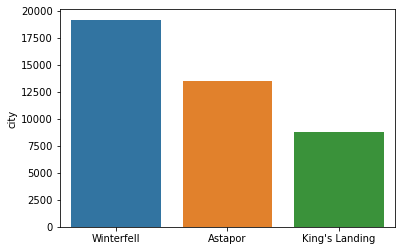

In [90]:
city_values = df.city.value_counts()
sns.barplot(city_values.index, city_values)

C:\Users\Phil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ultimate_black_user'>

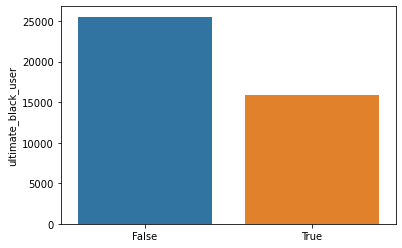

In [91]:
ultimate_black_values = df.ultimate_black_user.value_counts()
sns.barplot(ultimate_black_values.index, ultimate_black_values)

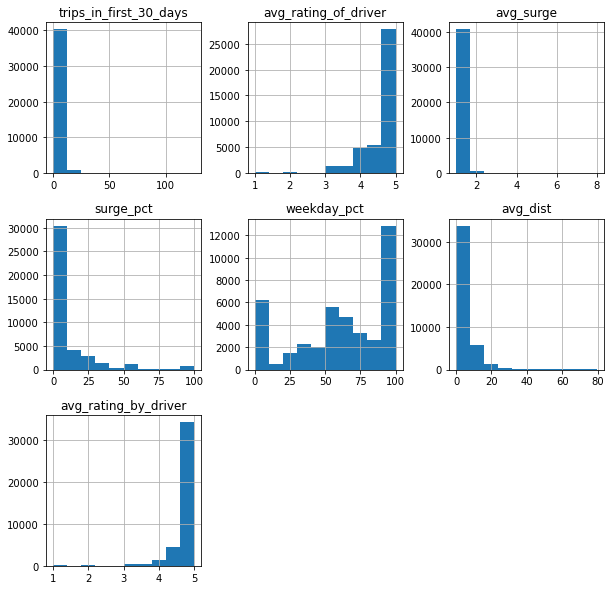

In [92]:
df_hist = df.drop(['signup_date','last_trip_date'], axis = 1)
ax = df_hist.hist(figsize = (10,10))
plt.show()

## Feature Engineering

In [93]:
# Determining an active user based on use within the past 30 days.

start_date = pd.to_datetime('2014-05-1')
end_date = pd.to_datetime('2014-06-1')


# make a new dataframe that only contains rows that have a 'last_trip_date' value between may 1st and may 31st
active = df.loc[(df['last_trip_date'] > start_date) & (df['last_trip_date'] < end_date)]

#initialize active column with 0's
# create a new column where active = 1 if a row in the dataframe is in the active dataframe, 0 if it is not in the dataframe
df['active'] = 0
df['active'] = np.where(df.isin(active), 1, 0)

active

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
10,Winterfell,1,2014-01-13,5.0,1.00,2014-05-30,iPhone,0.0,True,100.0,4.28,4.9
24,Astapor,4,2014-01-19,4.5,1.02,2014-05-18,iPhone,9.1,False,36.4,2.10,4.7
41,Winterfell,0,2014-01-18,4.0,1.88,2014-05-10,iPhone,50.0,False,0.0,3.80,5.0
51,Winterfell,4,2014-01-02,4.5,1.00,2014-05-02,Android,0.0,False,52.4,3.24,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49986,Winterfell,0,2014-01-21,4.0,1.00,2014-05-23,Android,0.0,False,100.0,0.52,5.0
49987,Winterfell,3,2014-01-27,4.6,1.00,2014-05-31,iPhone,0.0,False,80.0,4.24,4.0
49990,Astapor,1,2014-01-13,4.7,1.08,2014-05-18,iPhone,33.3,True,33.3,3.38,5.0
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5


In [94]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,0
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,1
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,1


In [95]:
# now that I have used the datetime columns to create the active feature, I can drop them from the dataframe
df = df.drop(['last_trip_date','signup_date'],axis =1)

In [96]:
df['ultimate_black_user'] = np.where(df['ultimate_black_user'] == True, 1, 0)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   avg_rating_of_driver    41445 non-null  float64
 3   avg_surge               41445 non-null  float64
 4   phone                   41445 non-null  object 
 5   surge_pct               41445 non-null  float64
 6   ultimate_black_user     41445 non-null  int32  
 7   weekday_pct             41445 non-null  float64
 8   avg_dist                41445 non-null  float64
 9   avg_rating_by_driver    41445 non-null  float64
 10  active                  41445 non-null  int32  
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 3.5+ MB


In [98]:
dummies = pd.get_dummies(df)

dummies

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,0,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,3,4.8,1.11,11.1,1,55.6,2.53,4.7,0,1,0,0,0,1
49994,1,4.6,1.44,37.5,0,25.0,2.25,4.5,1,1,0,0,0,1
49995,0,5.0,1.00,0.0,0,100.0,5.63,4.2,0,0,1,0,0,1
49997,0,5.0,1.00,0.0,1,100.0,3.86,5.0,1,0,0,1,1,0


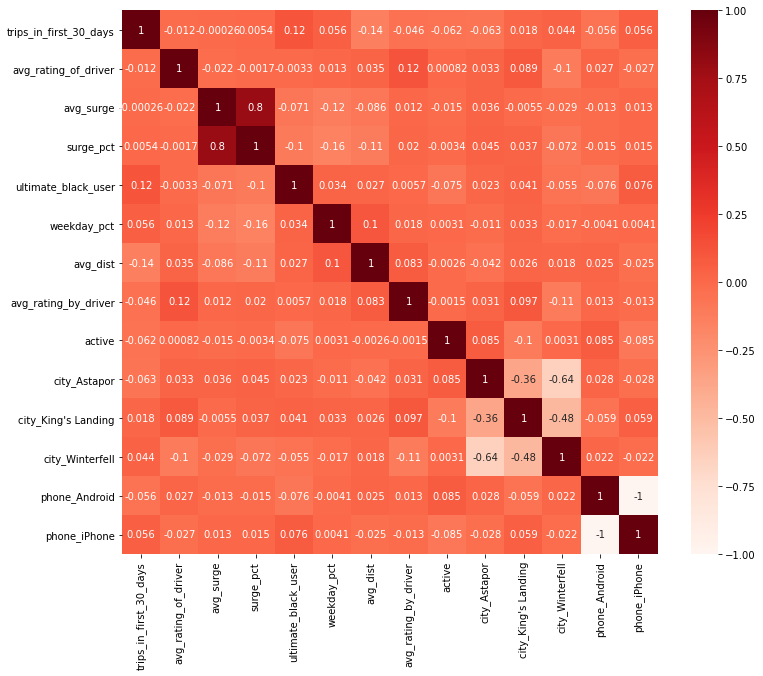

In [99]:
correlation_heatmap(dummies)

In [100]:
dummies.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone'],
      dtype='object')

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance

## Modeling

In [102]:
#define X and y variables, make sure to drop adopted_users from the dataframe
X = dummies.drop('active', axis=1)
y = dummies['active']

In [108]:
#https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

#split the data into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22, stratify=y)

#create a pipeline that scales the data
#model_name[0] and [1] are based on rand_forest variable
pipe = Pipeline([('scaler', StandardScaler()), ('random_forest', RandomForestClassifier())])

#fit the model using the training data
pipe.fit(X_train, y_train)

#y value predictions based on the X_test sample
y_pred = pipe.predict(X_test)

# print accuracy score
print(f"The accuracy of the random forest model is {accuracy_score(y_test, y_pred)}")


The accuracy of the random forest model is 0.8320868516284681


Text(0.5, 0, 'Mean decrease in impurity')

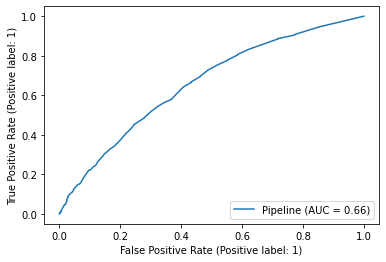

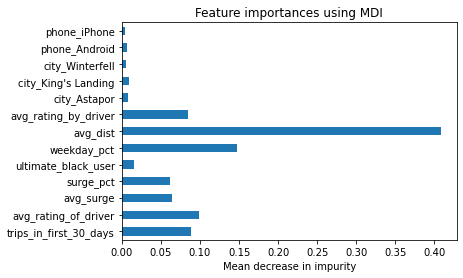

In [104]:
#plot ROC curve

#credit (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
plot_roc_curve(pipe, X_test, y_test)

feature_names = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
   'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
   'avg_rating_by_driver', 'city_Astapor', "city_King's Landing",
   'city_Winterfell', 'phone_Android', 'phone_iPhone']


#pull out RandomForestClassifier() from the pipeline
forest = pipe.steps[1][1]


importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")

In [105]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [109]:
#create a pipeline that scales the data and applies algorithm
pipe = Pipeline([('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())])

#fit the model using the training data
pipe.fit(X_train, y_train)

#y value predictions based on the X_test sample
y_pred = pipe.predict(X_test)

# print accuracy score
print(f"The accuracy of the logistic regression model is {accuracy_score(y_test, y_pred)}")

The accuracy of the logistic regression model is 0.8494571773220748
